<a href="https://colab.research.google.com/github/rachel1234561/ds2002project/blob/main/analysis_viz.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Visualizations & Analysis**
### The first section uses college scorecard data, which is organized by institution and other variables.
### The second part uses American Community Survey data, which describes median earnings based on education.

### **College Scorecard**

In [2]:
#Import packages
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from plotnine import *

In [ ]:
!git clone https://github.com/rachel1234561/ds2002project.git

Cloning into 'ds2002project'...
remote: Enumerating objects: 6, done.
remote: Counting objects: 100% (6/6), done.
remote: Compressing objects: 100% (5/5), done.
remote: Total 6 (delta 0), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (6/6), 128.11 KiB | 1001.00 KiB/s, done.


In [27]:
data = pd.read_csv('college_data_clean.csv')
data=data.drop('degree_type',axis=1)
variables = data.columns.tolist()
variables

['id',
 'name',
 'zip',
 'city',
 'state',
 'acceptance_rate',
 'part_time',
 'debt',
 'pell_grant',
 'stud_fac_ratio',
 'percent_loans',
 'graduation_rate',
 'yearly_cost',
 'student_pop',
 'earnings',
 'school_type',
 'region',
 'average_act',
 'precent_female',
 'average_income']

In [31]:
data['yearly_cost'] = pd.to_numeric(data['yearly_cost'], errors='coerce')
data['earnings'] = pd.to_numeric(data['earnings'], errors='coerce')

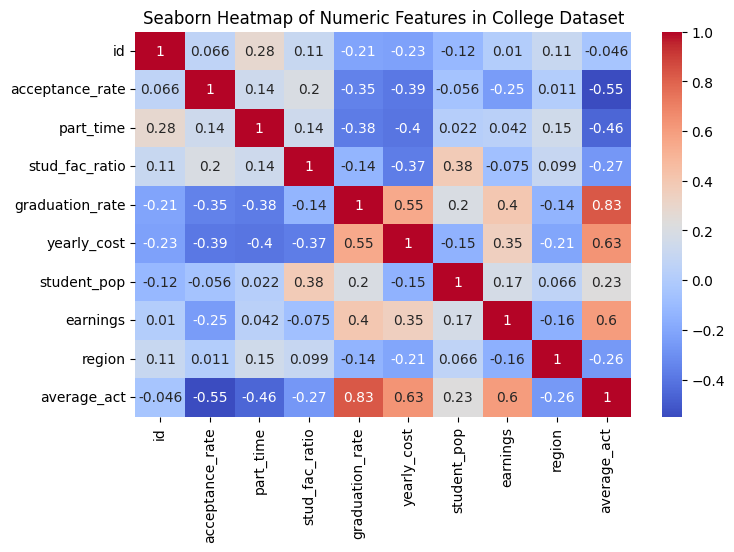

In [124]:
# Compute the correlation matrix using only numeric columns
numeric_vars = data.select_dtypes(include=['float64', 'int64'])
correlation_matrix = numeric_vars.corr()

# Create a heatmap to assess relationship between earnings and other factors
plt.figure(figsize=(8, 5))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Seaborn Heatmap of Numeric Variables in College Dataset')
plt.show()

R= 0.35016672107437735


/usr/local/lib/python3.10/dist-packages/plotnine/layer.py:364: PlotnineWarning: geom_point : Removed 292 rows containing missing values.


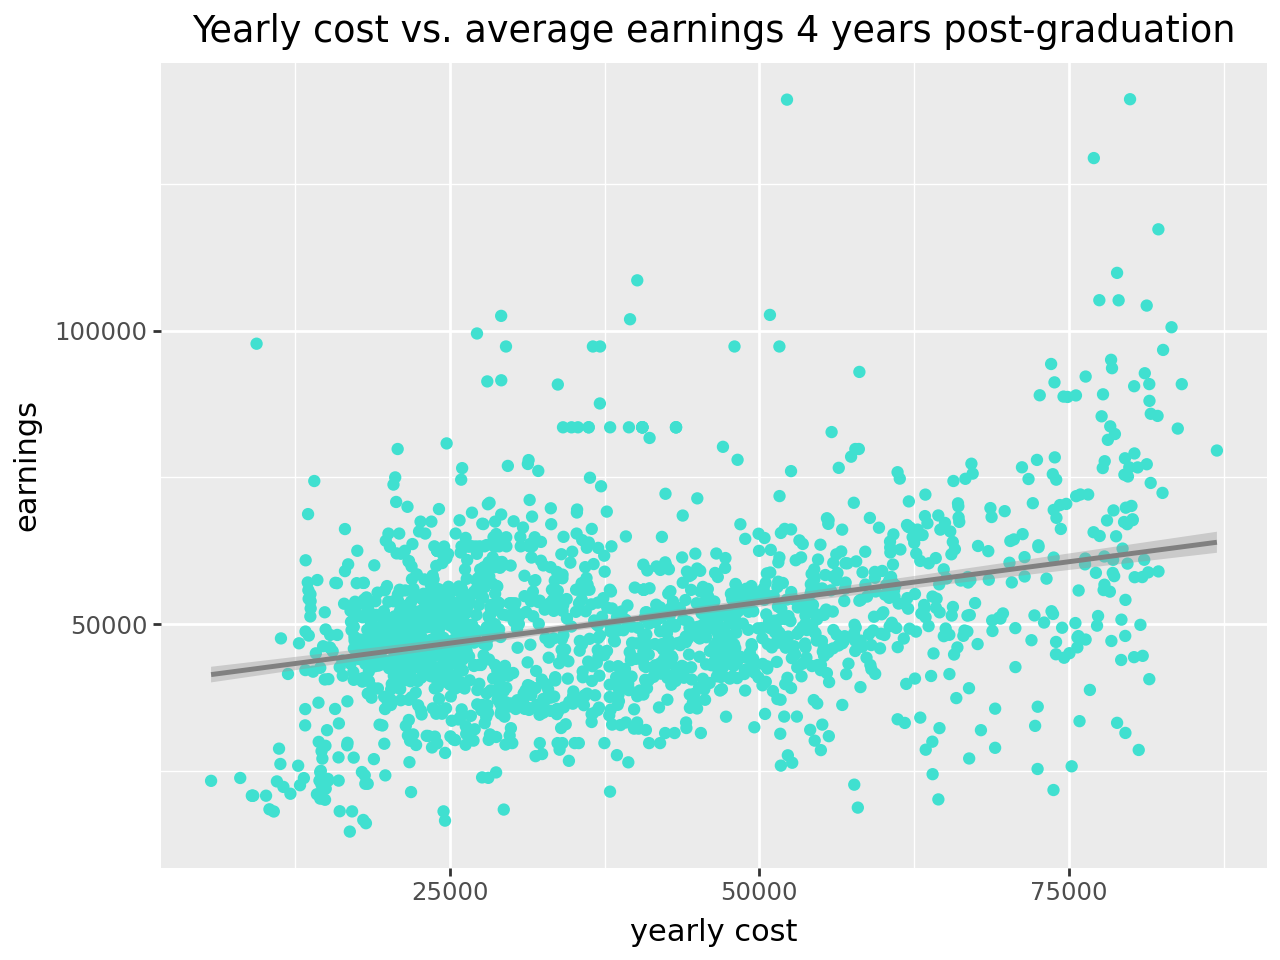

In [107]:
# Create a scatterplot to explore relationship between post-graduation earnings and cost of college attendance.
r_1 = data['yearly_cost'].corr(data['earnings'])
print('R=',r_1)
ggplot(data,aes(x='yearly_cost',y='earnings'))+geom_point(color='turquoise')+geom_smooth(color='gray')+labs(title='Yearly cost vs. average earnings 4 years post-graduation',x='yearly cost')

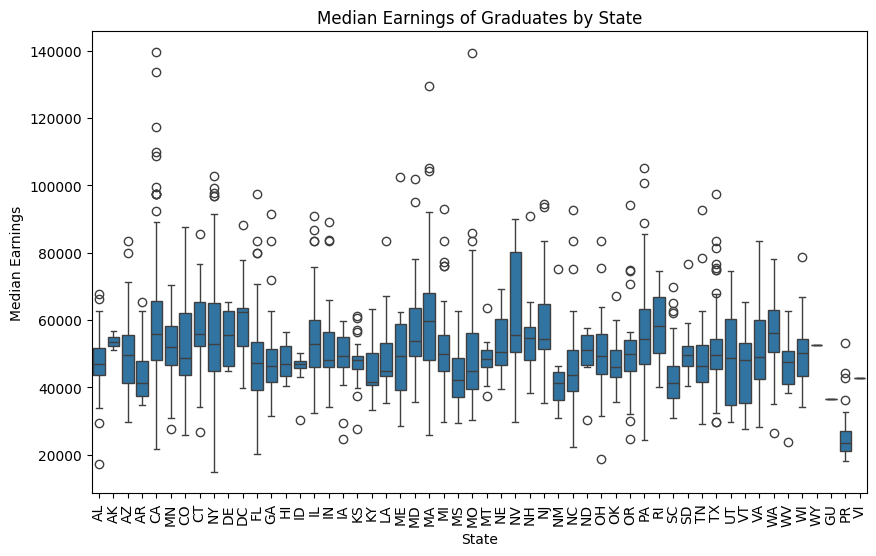

In [123]:
# Create a box plot to compare median earnings by state
plt.figure(figsize=(10, 6))
sns.boxplot(x='state', y='earnings', data=data)
plt.title('Median Earnings of Graduates by State')
plt.xlabel('State')
plt.ylabel('Median Earnings')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.show()

### **American Community Survey**

In [96]:
earnings_edu = pd.read_csv("state_earnings.csv")
earnings_edu.set_index('State', inplace=True)

In [93]:
earnings_edu.describe()

,MedianEarnings,Less_than_highschool,Highschool,Some_college_Associates,Bachelors,Graduates_Professional
count,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000
mean,48559.557692,30302.576923,37211.826923,43358.884615,61451.326923,79424.269231
std,8195.940756,3724.982449,4119.480382,4975.392666,9298.244040,12961.111983
min,21198.000000,12135.000000,16442.000000,19395.000000,27844.000000,39102.000000
25%,44048.250000,28879.000000,35122.500000,40647.000000,56745.500000,71319.500000
50%,47275.500000,30830.500000,37018.000000,43645.000000,59323.500000,76751.000000
75%,52174.250000,33103.250000,39832.000000,46471.750000,66924.750000,86244.000000
max,83447.000000,35724.000000,44342.000000,52261.000000,86371.000000,117089.000000


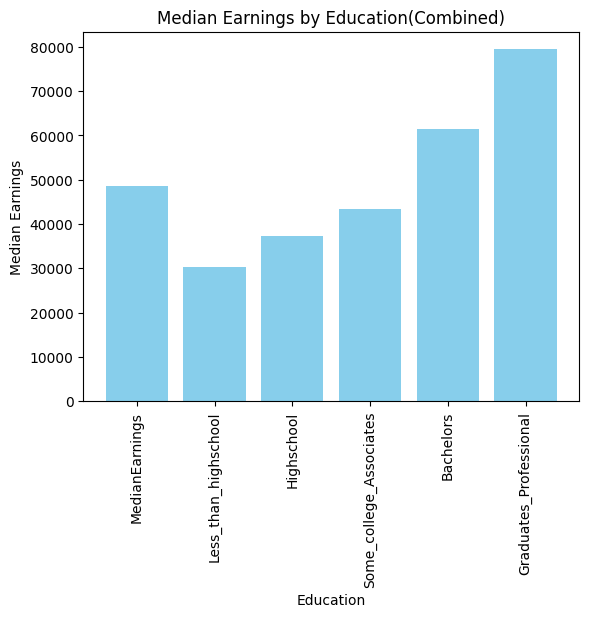

In [127]:
earnings_avgs=earnings_edu.mean()
y=list(earnings_avgs)
x=list(earnings_avgs.index)
plt.bar(x,y,width=.8,color='skyblue')
plt.xticks(rotation=90)
plt.ylabel('Median Earnings')
plt.xlabel('Education')
plt.title('Median Earnings by Education(Combined)')
plt.show()

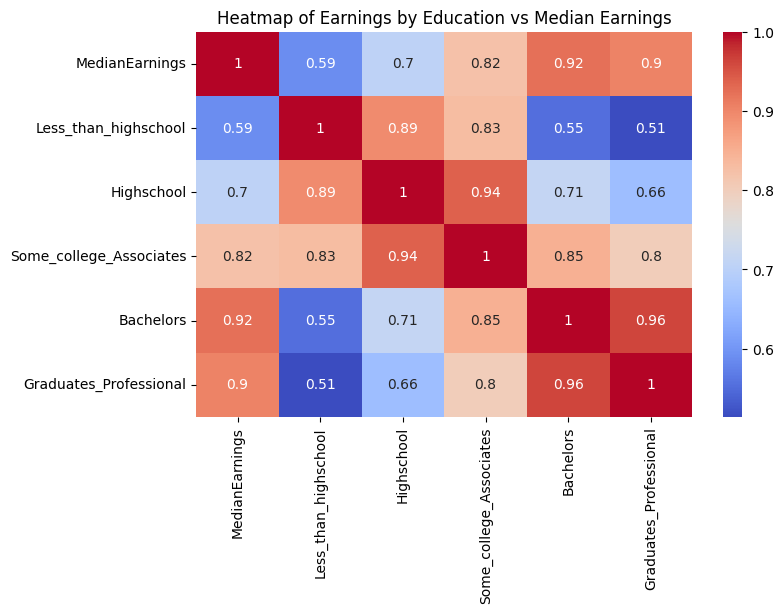

In [112]:
# Create a heatmap to assess relationships between earnings at different levels of education
plt.figure(figsize=(8, 5))
sns.heatmap(earnings_edu.corr(), annot=True, cmap='coolwarm')
plt.title('Heatmap of Earnings by Education vs Median Earnings')
plt.show()

R= 0.9238465231393022


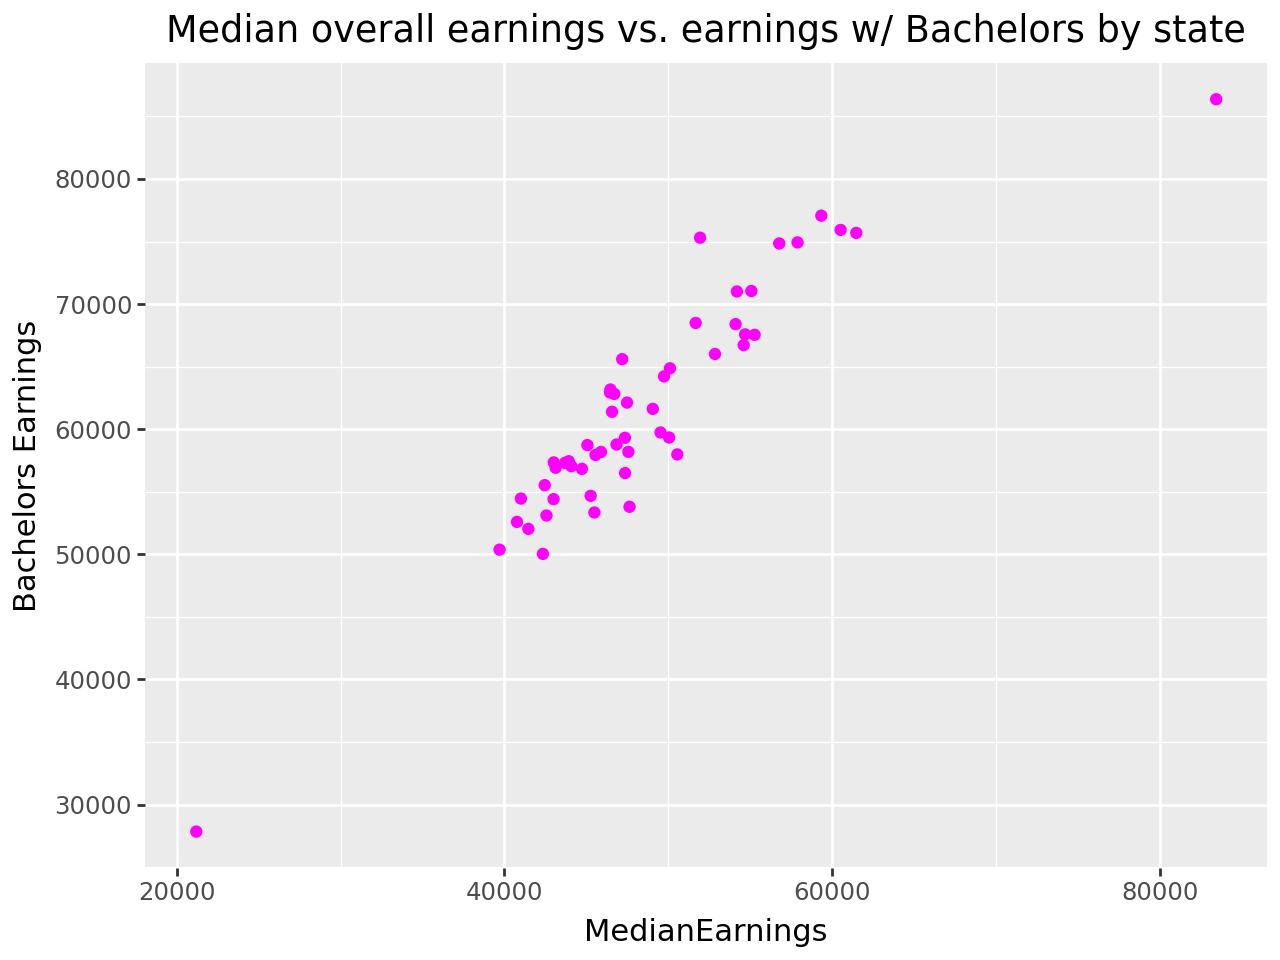

In [131]:
#Calculate correlation coefficient between median earnings and bachelors earnings
r_2 = earnings_edu['MedianEarnings'].corr(earnings_edu['Bachelors'])
print('R=',r_2)
#Visualize with scatterplot
ggplot(earnings_edu,aes(x='MedianEarnings',y='Bachelors'))+geom_point(color='magenta')+labs(title='Median overall earnings vs. earnings w/ Bachelors by state',y='Bachelors Earnings')